In [214]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from scipy.io import loadmat

dataset = loadmat('face_emotion_data.mat')

x, y = dataset['X'], dataset['y']
n, p = np.shape(X)

X = np.hstack((np.ones((n,1)), x))  # append a column of ones

# Problem 1a - Devin Bresser

def gaussian_kernel(u, v, sigma):
    return np.exp(-euclidean_distances(u, v, squared=True) / (2 * sigma**2))

def get_K_and_alpha(X_train, y_train, sigma_, lmda_):
    K_train = gaussian_kernel(X_train, X_train, sigma_)
    alpha = np.linalg.inv(K_train + lmda_*np.eye(len(K_train))) @ y_train
    return K_train, alpha

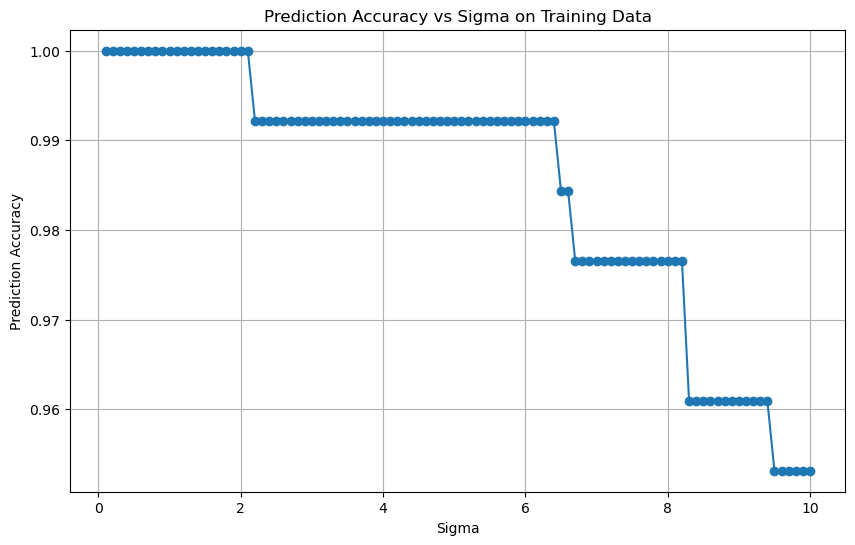

In [215]:
# Problem 1b

sigmas = np.linspace(0.1,10,100)
lmda = 0.5
accuracies = []

for sigma_ in sigmas:
    K, alpha = get_K_and_alpha(X, y, sigma_, lmda)
    predictions = np.sign(K @ alpha)
    accuracy = np.mean(predictions == y)
    accuracies.append(accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sigmas, accuracies, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Prediction Accuracy')
plt.title('Prediction Accuracy vs Sigma on Training Data')
plt.grid(True)
plt.show()

In [216]:
# Problem 1b comment: The classifier achieves 0 training error
# when sigma < approximately 2.1
# We observe that increasing sigma decreases the accuracy on the training data
# which makes sense, as it is a parameter that tunes how "smooth" the fit is.

In [223]:
# Problem 1c

from sklearn.model_selection import KFold

kf = KFold(n_splits = 8)

sigmas = np.linspace(0.1,10,100)
lmda = 0.5

avg_accuracies = []

for sigma_ in sigmas:
    
    fold_accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Compute K and alpha for the training data
        K_train, alpha = get_K_and_alpha(X_train, y_train, sigma_, lmda)

        # Compute predictions on the test set
        K_test = gaussian_kernel(X_test, X_train, sigma_)
        predictions = np.sign(K_test @ alpha)

        # Compute accuracy
        accuracy = np.mean(predictions == y_test)
        fold_accuracies.append(accuracy)

    avg_accuracies.append(np.mean(fold_accuracies))

sigma_accuracies = list(zip(sigmas, avg_accuracies))
highest_accuracy_pair = max(sigma_accuracies, key=lambda pair: pair[1])
print(f"Highest avg. (8-fold CV) test accuracy: {highest_accuracy_pair[1]} achieved at sigma={highest_accuracy_pair[0]}")

# Comment: Sigma=3.4 gives the highest average testing accuracy 0.961

Highest avg. (8-fold CV) test accuracy: 0.9609375 achieved at sigma=3.4000000000000004
